<a href="https://colab.research.google.com/github/mohammadzainabbas/AI-Decision-Support-Systems/blob/master/Intro_to_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning with Keras
## Importing modules

In [1]:
import numpy as np
from numpy import linalg
np.set_printoptions(precision=2, suppress=True, linewidth=150)
import matplotlib.pyplot as plt
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## Loading the MNIST dataset

In [0]:
from keras.datasets import mnist

# loading and splitting into training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# for referring later on ...
(x_train_o, y_train_o), (x_test_o, y_test_o) = mnist.load_data()

In [3]:
print("Training data has shape {} and Testing data's shape is {}".format(x_train.shape, x_test.shape)) 
print("Total training data's labels are {} and Total testing data's labels are {}".format(len(y_train), len(y_test))) 


Training data has shape (60000, 28, 28) and Testing data's shape is (10000, 28, 28)
Total training data's labels are 60000 and Total testing data's labels are 10000


### Some display function

In [0]:
def Display_Image_Matrix(image_matrix, pic_num):
  print(np.matrix(image_matrix[pic_num]))

In [0]:
def Show_Pic_and_Value(image_matrix, label_vector, pic_num):
  plt.imshow(image_matrix[pic_num], cmap=plt.cm.binary)
  print(label_vector[pic_num])

#### Checking some training images

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  26 128 178 245 161 162 144  13   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  26 164 239 254 253 253 253 254 253 226  38   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  83 224 253 202 113  46  46  46 138 226 253 

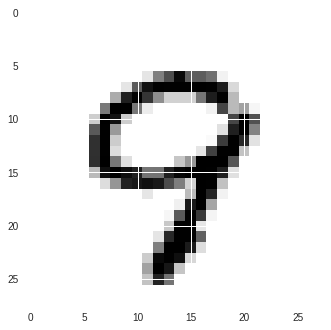

In [6]:
pic_num = 57699
Show_Pic_and_Value(x_train, y_train, pic_num)
Display_Image_Matrix(x_train, pic_num)



#### Now, checking some test images

6
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 204 253 176   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7 150 252 252 125   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 117 252 186  56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 141 252 118   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 154 247  50   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  26 253 196   0   0   0   0   0   0   0   0 

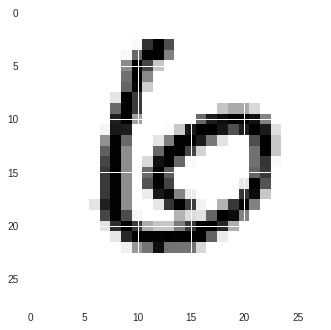

In [7]:
pic_num = 11
Show_Pic_and_Value(x_test, y_test, pic_num)
Display_Image_Matrix(x_test, pic_num)

##### Normalizing images 

In [8]:
print("Training images are {} and Testing images are {}".format(x_train.dtype, x_test.dtype)) 
print("{} datatype has min value of {} and max value of {}".format(x_train.dtype, np.iinfo(x_train.dtype).min, np.iinfo(x_train.dtype).max))

Training images are uint8 and Testing images are uint8
uint8 datatype has min value of 0 and max value of 255


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= np.iinfo('uint8').max
x_test /= np.iinfo('uint8').max

In [10]:
print("Training images are {} and Testing images are {}".format(x_train.dtype, x_test.dtype)) 
#print("{} datatype has min value of {} and max value of {}".format(x_train.dtype, np.finfo(x_train.dtype).min, np.finfo(x_train.dtype).max))

Training images are float32 and Testing images are float32


6
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.8  0.99 0.69 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.59 0.99 0.99 0.49 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.46 0.99 0.73 0.22 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.55 0.99 0.46 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 

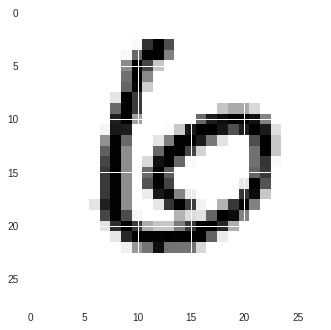

In [11]:
pic_num = 11
Show_Pic_and_Value(x_test, y_test, pic_num)
Display_Image_Matrix(x_test, pic_num)

### 2D Image to 1D Vector

In [12]:
print("Before: Training data has shape {} and Testing data's shape is {}".format(x_train.shape, x_test.shape)) 

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print("After: Training data has shape {} and Testing data's shape is {}".format(x_train.shape, x_test.shape)) 

Before: Training data has shape (60000, 28, 28) and Testing data's shape is (10000, 28, 28)
After: Training data has shape (60000, 784) and Testing data's shape is (10000, 784)


#### Converting to categorial labels (for classification purposes)

In [13]:
from keras.utils import to_categorical

print("Before: Label was {}".format(y_train[0])) 

c_y_train = to_categorical(y_train, num_classes=10)
c_y_test = to_categorical(y_test, num_classes=10)

print("After: Label was {}".format(c_y_train[0])) 

Before: Label was 5
After: Label was [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
print("Training data's label has shape {} and Testing data's label shape is {}".format(c_y_train.shape, c_y_test.shape)) 

Training data's label has shape (60000, 10) and Testing data's label shape is (10000, 10)


#### Model defining with Keras

In [15]:
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import sgd

model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.summary()

plot_model(model,to_file='model.png',show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________



#### Definition model parameters, training and evaluation


In [16]:
#The batch size is a number of samples processed before the model is updated.
#The number of epochs is the number of complete passes through the training dataset.

batch_size = 256
num_classes = 10
epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(x_train, c_y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1
          )

test_loss, test_acc = model.evaluate(x_test, c_y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 2.1964 - acc: 0.3410
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 1.9127 - acc: 0.6478
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 1.6731 - acc: 0.7188
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 1.4628 - acc: 0.7614
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 1.2870 - acc: 0.7860
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 1.1446 - acc: 0.8036
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 1.0309 - acc: 0.8164
Epoch 8/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.9402 - acc: 0.8264
Epoch 9/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.8671 - acc: 0.8341
Epoch 10/10
10000/10000 [==============================] - 1s 53us/step
Test loss: 0.762142910385131

### Prediction on Testing data

In [0]:
predictions = model.predict(x_test)

In [18]:
predictions.shape

(10000, 10)

In [0]:
def Display_Predict_Value(pred, pic_num):
  print("Predicted Value for image {} is {}".format(pic_num, np.argmax(predictions[pic_num])))

Predicted Value for image 11 is 6
6
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 204 253 176   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7 150 252 252 125   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 117 252 186  56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 141 252 118   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 154 247  50   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  26 253 19

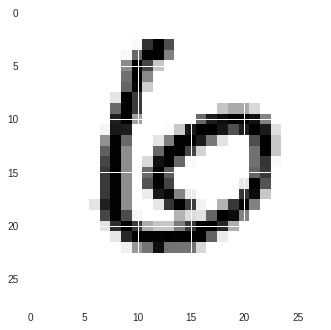

In [20]:
pic_num = 11
Display_Predict_Value(predictions, pic_num)
Show_Pic_and_Value(x_test_o, y_test_o, pic_num)
Display_Image_Matrix(x_test_o, pic_num)

In [0]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')



#### Confusion Matrix for ANN

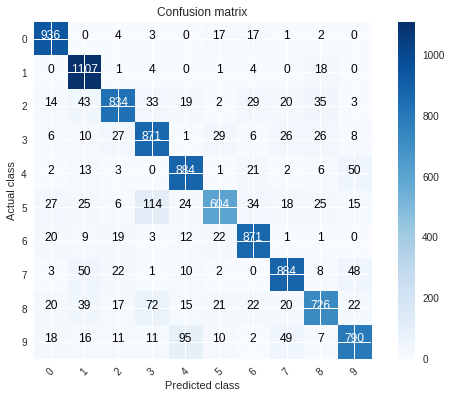

In [22]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(c_y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

##### Let's see where it was wrong

In [23]:
Y_pred_classes = np.argmax(predictions, axis = 1) 
Y_true = np.argmax(c_y_test, axis = 1) 
diff = np.where(Y_pred_classes != Y_true)
diff

(array([   8,   15,   20, ..., 9985, 9992, 9998]),)

Predicted Value for image 20 is 7
9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31 140 193  44   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  38 146 240 254 254 228  48  77  46   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   

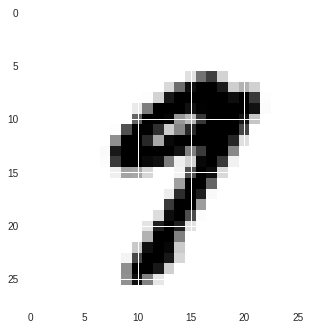

In [24]:
pic_num = 20
Display_Predict_Value(predictions, pic_num)
Show_Pic_and_Value(x_test_o, y_test_o, pic_num)
Display_Image_Matrix(x_test_o, pic_num)


## Now same thing with CNN model

In [25]:
img_rows, img_cols = 28, 28
nb_classes = 10
nb_epoch = 10

nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window size of filter

# data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

model1 = Sequential()
model1.add(Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=(img_cols, img_rows, 1)))
model1.add(Activation('relu'))
model1.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])
history1 = model1.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=256, verbose=1)
test_loss1, test_acc1 = model1.evaluate(X_test, Y_test)

print('Test Loss: With ANN - {}, With CNN {}'.format(test_loss,test_loss1))
print('Test Accuracy: With ANN - {}, With CNN {}'.format(test_acc,test_acc1))

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.3796 - acc: 0.8850
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1093 - acc: 0.9673
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0740 - acc: 0.9776
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0578 - acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0461 - acc: 0.9860
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0379 - acc: 0.9883
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0331 - acc: 0.9900
Epoch 8/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0280 - acc: 0.9912
Epoch 9/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0236 - acc: 0.9931
Epoch 10/10
10000/10000 [==============================] - 1s 78us/step
Test Loss: With ANN - 0.7621

#### Confusion Matrix for CNN

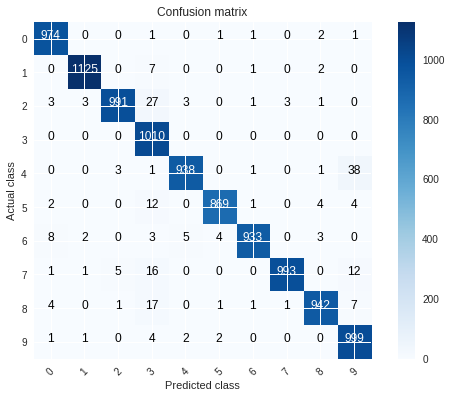

In [26]:
# Predict the values from the validation dataset
Y_pred = model1.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

#### Let's see what CNN got wrong

In [27]:
predict = model1.predict(X_test)
Y_pred_classes = np.argmax(predict, axis = 1) 
Y_true = np.argmax(Y_test, axis = 1) 
diff = np.where(Y_pred_classes != Y_true)
diff

(array([ 115,  244,  250,  282,  321,  340,  445,  447,  497,  543,  582,  583,  619,  659,  684,  707,  720,  726,  740,  881,  939,  947,  951,
         956,  965, 1014, 1039, 1182, 1224, 1226, 1242, 1247, 1260, 1319, 1326, 1337, 1364, 1393, 1395, 1453, 1459, 1464, 1522, 1530, 1609, 1621,
        1654, 1671, 1678, 1701, 1709, 1717, 1721, 1754, 1790, 1871, 1878, 1883, 1987, 2004, 2018, 2035, 2043, 2053, 2070, 2094, 2118, 2130, 2135,
        2182, 2242, 2382, 2393, 2447, 2488, 2514, 2526, 2597, 2607, 2630, 2654, 2678, 2743, 2771, 2780, 2823, 2836, 2877, 2896, 2915, 2939, 2959,
        2970, 2990, 2995, 3030, 3172, 3289, 3330, 3333, 3384, 3388, 3410, 3422, 3437, 3451, 3503, 3504, 3520, 3558, 3597, 3626, 3681, 3702, 3726,
        3727, 3729, 3749, 3757, 3776, 3780, 3808, 3853, 3906, 3941, 3968, 4027, 4075, 4078, 4100, 4123, 4156, 4163, 4176, 4194, 4199, 4238, 4265,
        4350, 4382, 4433, 4497, 4507, 4536, 4571, 4578, 4598, 4639, 4671, 4699, 4731, 4783, 4807, 4814, 4823, 4860, 4911, 49

Predicted Value for image 9905 is 7
3
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  23 194 192 171   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  24 206 254 218  49   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 

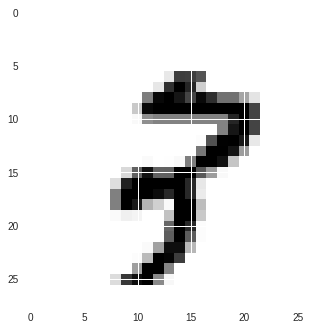

In [28]:
pic_num = 9905
Display_Predict_Value(predict, pic_num)
Show_Pic_and_Value(x_test_o, y_test_o, pic_num)
Display_Image_Matrix(x_test_o, pic_num)


#### Comparasion between two neural networks

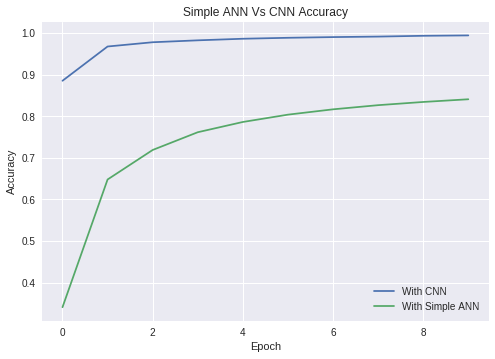

In [29]:
plt.plot(history1.history['acc'])
plt.plot(history.history['acc'])
plt.title('Simple ANN Vs CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['With CNN', 'With Simple ANN'], loc='lower right')
plt.show()